In [1]:
from maelzel.core import *

w = getWorkspace()
cfg = w.config


Chain([3E:3/4♩:gliss=True, 3E↓, 3A-:~1/6♩:gliss=True, 3G♯, 3A, 3G+:~1/12♩:gliss=True, 3A♭↓, 3C:~1/12♩])
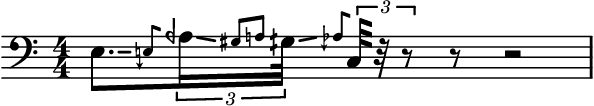

In [3]:
chain = Chain([
    Note("3E", F(3, 4), gliss=True),
    Note("3E<", 0),
    Note("3A-", 0.917-0.75, gliss=True),
    Note("3Ab", 0),
    Note("3A", 0),
    Note("3G+", 1-0.917, gliss=True),
    Note("3Ab-25", 0),
    Note("3C", 0.083)
    
])
chain.write("~/tmp/grace.ly")
chain.addSpanner('beam', 0, 1)
chain

In [5]:
chain.play()

using libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=5)
    Synth(‖ preset:.piano=401.0002 start=.163 dur=.75 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=52 p21=0.515178 p22=0.678571 p23=51.75 …)
    Synth(‖ preset:.piano=401.0003 start=.913 dur=.111 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=56.5 p21=0.515178 p22=0.0556667 p23=56 …)
    Synth(‖ preset:.piano=401.0004 start=1.025 dur=.056 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=57 p21=0.515178 p22=0.0556667 p23=57 …)
    Synth(‖ preset:.piano=401.0005 start=1.08 dur=.083 kpos=0.5 kgain=1 idataidx_=19 inumbps=3 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=55.5 p21=0.515178 p22=0.0415 p23=55.75 …)
    Synth(‖ preset:.piano=401.0006 start=1.163 dur=.083 kpos=0.5 kgain=1 idataidx_=19 inumbps=2 ibplen=3 ichan=1 ifadein=0.02 ifadeout=0.02 ipchintrp_=0 ifadekind=1 ktransp=0 ipitchlag=0.1 ivel=-1 kwet=0 p19=0 p20=48 p21=0.515178 p22=0.083 p23=48 …)

Chain([3E:3/4♩:gliss=True, 3E↓, 3A-:~1/6♩:gliss=True, 3G♯, 3A, 3G+:~1/12♩:gliss=True, 3A♭↓, 3C:~1/12♩])
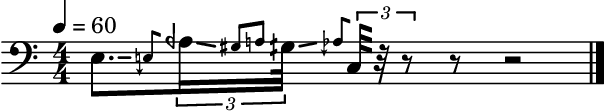

In [6]:
chain

In [4]:
w.scorestruct = "2/4, 4=120"

Score(2 voices)
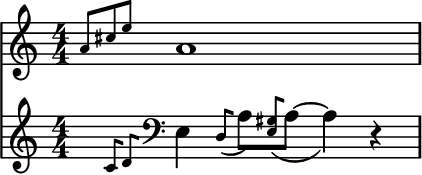

In [4]:
v1 = Voice([
    "4C:0",
    "4D:0",
    Note("3E:1"),
    Note("3D:0:slur"),
    Note("3A:1/2").addSpanner("~slur"),
    Chord("3G#,3E:0:slur"),
    Note("3A:1+1/2").addSpanner("~slur"),    
])
v2 = Voice(r'''
4A:0
5C#:0
5E:0
4A:4
''')
s = Score([v2, v1])
s

In [5]:
s.write("~/tmp/graces0.ly")

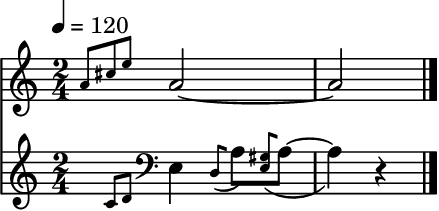

In [9]:
s.play()
s.show()

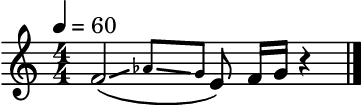

[«4Fgliss 0:2 2♩ spanners=[Slur(kind=start, linetype=solid, nestingLevel=1, uuid=l5zos0l8)]»,
 «4G#gliss 2:grace»,
 «4G 2:grace spanners=[Slur(kind=end, linetype=solid, nestingLevel=1, uuid=l5zos0l8)]»,
 «4E 2:2.5 1/2♩»,
 «4F 2.5:2.75 1/4♩ spanners=[Beam(kind=start, linetype=solid, nestingLevel=1, uuid=7702cwzm)]»,
 «4G 2.75:3 1/4♩ spanners=[Beam(kind=end, linetype=solid, nestingLevel=1, uuid=7702cwzm)]»]

In [4]:
events = [
    "4F:2:gliss",
    "4Ab:0:gliss",
    "4G:0",
    "e4:0.5",
    "f4:0.25",
    "g4:0.25",
    
]
chain = Chain(events)
chain[0].addSpanner('slur', chain[2])
chain[4].addSpanner('beam', chain[5])
# chain[5].addSymbol('breath')
chain.write('~/tmp/slur.ly')
chain.show()
evs = chain.scoringEvents()
evs

Chain([4F:2♩:gliss=True:symbols=[Slur(anchor=Slur, kind=start, linetype=solid, partnerSpanner=Slur, uuid=5xlcfcux)], 4G#:symbols=[Slur(anchor=Slur, kind=end, linetype=solid, partnerSpanner=Slur, uuid=5xlcfcux)], 4G, 4E:0.5♩, 4F:0.25♩:symbols=[Beam(anchor=Beam, kind=start, linetype=solid, partnerSpanner=Beam, uuid=iqlm154q)], 4G:0.25♩:symbols=[Beam(anchor=Beam, kind=end, linetype=solid, partnerSpanner=Beam, uuid=iqlm154q)]])
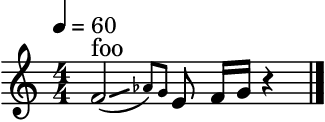

In [5]:
events = [
    "4F:2:gliss:label=foo",
    "4Ab:0",    
    "4G:0",
    "e4:0.5",
    "f4:0.25",
    "g4:0.25",
    
]
chain = Chain(events)
chain[0].addSpanner('slur', chain[1])
chain[4].addSpanner('beam', chain[5])
chain

## 1

Chain([4F:1♩:gliss=True, 4F~:1.5♩, 4F:0.7♩:gliss=True, 4G])
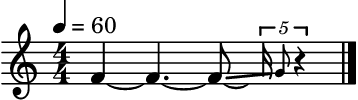

In [6]:
events = [
    "4F:1:gliss",
    "4F~:1.5", 
    "4F:0.7:gliss",
    "4G:0",
    #"e4:0.5",
    #"f4:0.25",
    #"g4:0.25",
    
]
chain = Chain(events)
#chain[2].addSymbol(symbols.Stem(hidden=True))
#chain[0].addSpanner('slur', chain[2])
chain

Chain([4F~:2♩, 4F:0.25♩:gliss=4A, 4F>:0.95♩:gliss=True, 4E+])
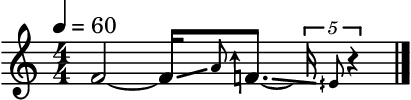

In [7]:
from maelzel.core import *

events = [
    "4F~:2",
    "4F:0.25:gliss=4a", 
    "4F+25:0.95:gliss",
    "4E+:0",
    #"e4:0.5",
    #"f4:0.25",
    #"g4:0.25",
    
]
chain = Chain(events)
#chain[2].addSymbol(symbols.Stem(hidden=True))
#chain[0].addSpanner('slur', chain[2])
chain

In [8]:
qs = chain.quantizedScore()
m0 = qs.parts[0].measures[0]

In [3]:
m0.beats

[QuantizedBeat(divisions: (1,), assignedSlots=[0], notations=[«4F~ 0:1 1♩»], beatDuration=1, beatOffset=0, quantizationError=0, weight=2),
 QuantizedBeat(divisions: (1,), assignedSlots=[0], notations=[«~4F~ 1:2 1♩»], beatDuration=1, beatOffset=1, quantizationError=0, weight=0),
 QuantizedBeat(divisions: (4,), assignedSlots=[0, 1, 1], notations=[«~4Fgliss 2:2.25 1/4♩», «4A 2.25:grace», «4F>~gliss 2.25:3 3/4♩»], beatDuration=1, beatOffset=2, quantizationError=0.040659, weight=1),
 QuantizedBeat(divisions: (5,), assignedSlots=[0, 1, 1], notations=[«~4F>gliss 3:3.2 1/5♩ 5/4», «4E+ 3.2:grace 5/4», «rest 3.2:4 4/5♩ 5/4»], beatDuration=1, beatOffset=3, quantizationError=0.040696, weight=0)]

Chain([4F:4♩, 4A:2.5♩:gliss=True, 4F:gliss=True, 4G, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩:gliss=True, 4F:gliss=True, …])
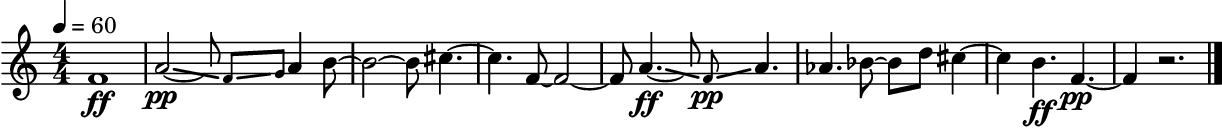

In [9]:
# Reset any active scorestruct to the default
setScoreStruct()

events = [
    "4F:4:ff",
    "4A:2.5:pp:gliss",
    "4F:0:gliss",    # dur=0 indicates a grace note
    "4G:0",
    "4A:1:pp",
    "4B:3",
    "5C#:3",
    "4F:3",
    "4A:2:ff:gliss",
    "4F:0:pp:gliss",
    "4A:1.5:pp",
    "4Ab:1.5",
    "4Bb:1",
    "5D:.5",
    "5C#:2",
    "4B:1.5:ff",
    "4F:2.5:pp"
]
chain = Chain(events)
chain.write('~/tmp/grace.ly')
chain

Chain([4F:4♩, 4A:2.5♩:gliss=True, 4F:gliss=True, 4G, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩:gliss=True, 4F:gliss=True, …])
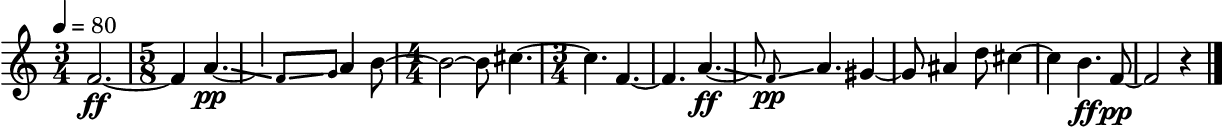

In [10]:
s = ScoreStruct(r'''
3/4, 80
5/8
.
4/4
3/4
''')
setScoreStruct(s)
chain


Chain([4F:4♩, 4A:2.5♩:gliss=True, 4F:gliss=True, 4G, 4A:1♩, 4B:3♩, 5C#:3♩, 4F:3♩, 4A:2♩:gliss=True, 4F:gliss=True, …])
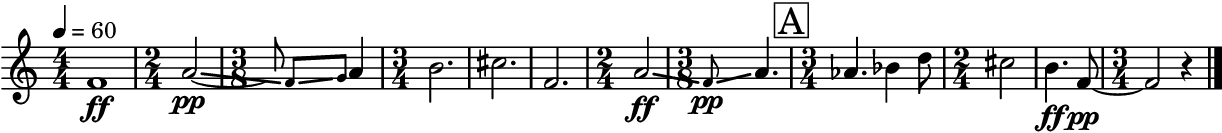

In [11]:
s2 = ScoreStruct(r'''
  4/4, 60
  2/4
  3/8
  3/4
  .
  .
  2/4
  3/8
  3/4,,A
  2/4
  .
  3/4
  4/4
  3/4
  4/4
  3/4
  2/4
  4/4
  .
  2/4,,B
  ''')

setScoreStruct(s2)
chain

Chain([4C:4♩, 4E, 4F:1♩])
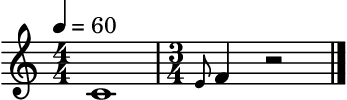

In [12]:
from maelzel.core import *

s = ScoreStruct(r'''
4/4
3/4
''')

setScoreStruct(s)

ch = Chain([
    "4C:4",
    "4E:0",
    "4F:1"
])

ch

In [14]:
r = ch.render()
r.quantizedScore.dump()

Part #0:
  Measure #0
    Timesig: 4/4(quarter=60)
    Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
      Node ratio: 1/1, offset=0, end=4, dur=4, symbolicdur=4
        «4C 0:4 4♩ attachments=[Clef(kind=treble)] properties={'clef': 'treble'}»
  Measure #1
    Timesig: 3/4(quarter=60)
    Node ratio: 1/1, offset=0, end=3, dur=3, symbolicdur=3
      Node ratio: 1/1, offset=0, end=1, dur=1, symbolicdur=1
        «4E 0:grace»
        «4F 0:1 1♩»
      Node ratio: 1/1, offset=1, end=3, dur=2, symbolicdur=2
        «rest 1:3 2♩»
